# Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [34]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [36]:
data.dropna(inplace =True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

x = data.drop(["median_house_value"], axis = 1)
y = data["median_house_value"]

In [39]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [40]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Data Exploration

### Join the data again

In [42]:
train_data = x_train.join(y_train)

In [43]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5087,-118.28,33.98,45.0,1720.0,416.0,1382.0,365.0,0.9337,<1H OCEAN,92300.0
10051,-121.00,39.16,10.0,1170.0,225.0,537.0,194.0,3.2813,INLAND,163200.0
11961,-117.42,33.89,4.0,80.0,10.0,55.0,13.0,7.7197,INLAND,193800.0
637,-122.15,37.73,28.0,2215.0,587.0,830.0,573.0,2.1898,NEAR BAY,141700.0
13478,-117.39,34.07,26.0,1387.0,277.0,664.0,239.0,3.0278,INLAND,96800.0
...,...,...,...,...,...,...,...,...,...,...
1958,-120.81,38.73,42.0,1276.0,260.0,799.0,259.0,2.7273,INLAND,128600.0
15117,-116.95,32.83,14.0,12517.0,2506.0,6389.0,2333.0,3.3081,<1H OCEAN,168700.0
3669,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518,<1H OCEAN,161600.0
11661,-118.02,33.81,34.0,3482.0,614.0,2227.0,641.0,5.1155,<1H OCEAN,200900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

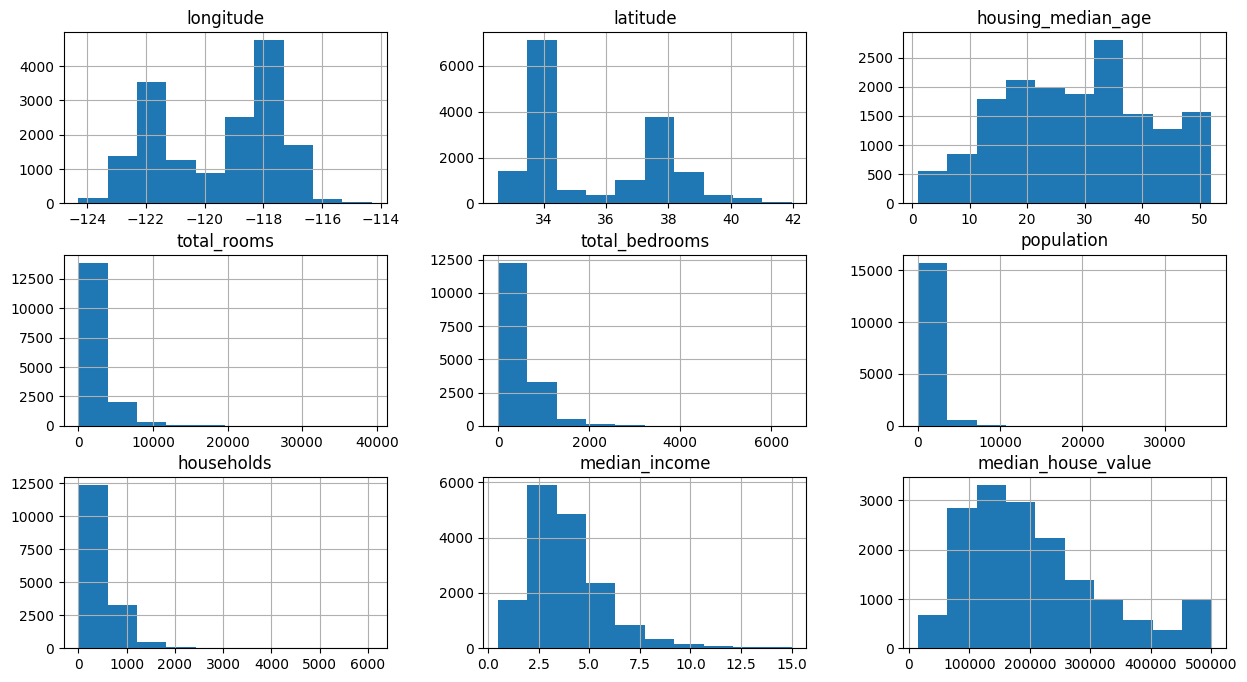

In [44]:
train_data.hist(figsize = (15,8))

## Checking the Corelation

<Axes: >

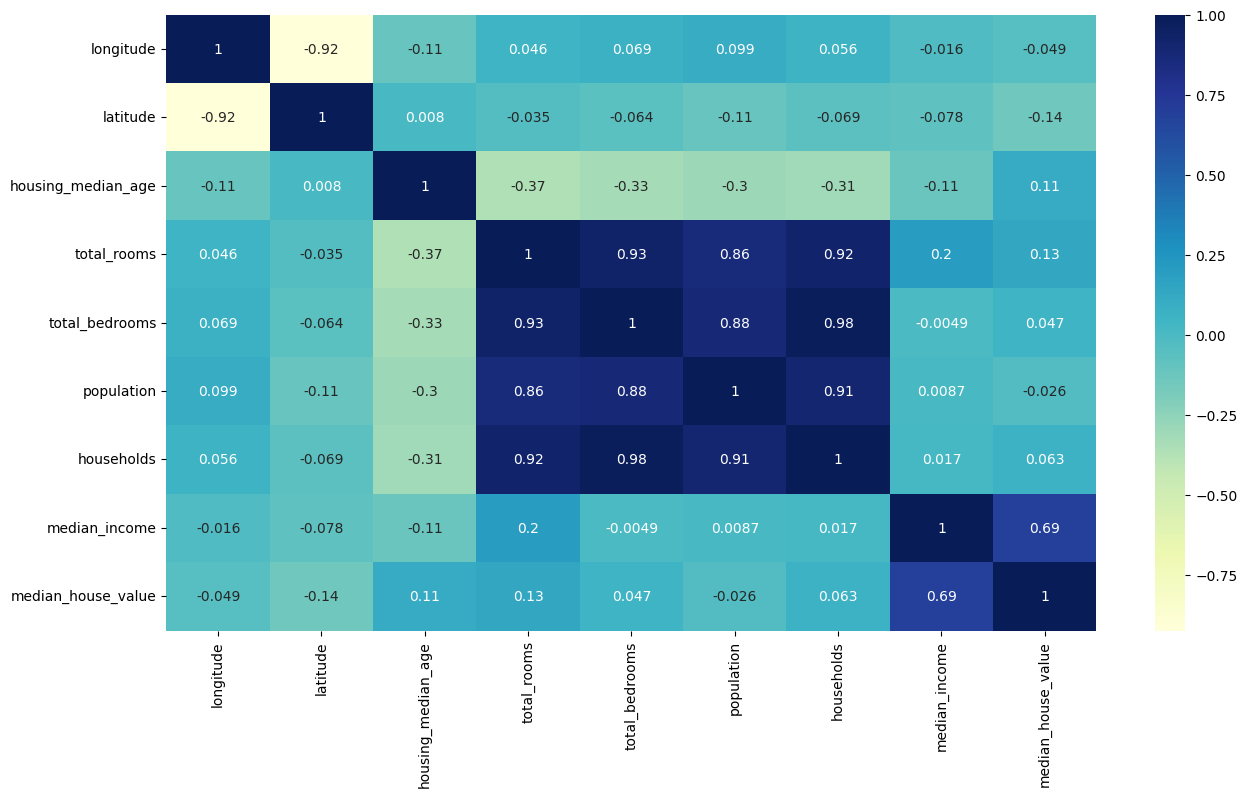

In [45]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap= "YlGnBu")

# Data Processing

In [46]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

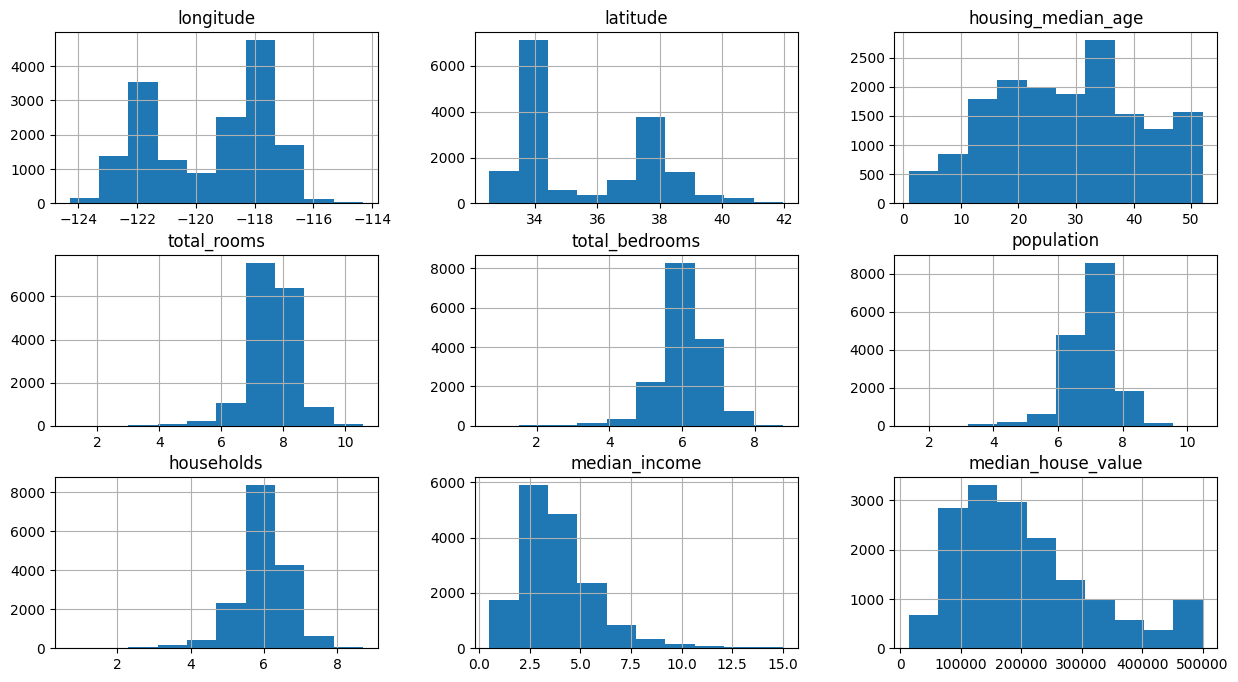

In [47]:
train_data.hist(figsize = (15,8))

## Include the ocean_proximity into the table itself

In [48]:
train_data.ocean_proximity.value_counts() # checks how many different names/values are in ocean_proximity

,count
ocean_proximity,
<1H OCEAN,7248
INLAND,5184
NEAR OCEAN,2058
NEAR BAY,1852
ISLAND,4


### Include the Names of ocean_proximity into the train_data

In [49]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

In [50]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5087,-118.28,33.98,45.0,7.450661,6.033086,7.232010,5.902633,0.9337,92300.0,True,False,False,False,False
10051,-121.00,39.16,10.0,7.065613,5.420535,6.287859,5.273000,3.2813,163200.0,False,True,False,False,False
11961,-117.42,33.89,4.0,4.394449,2.397895,4.025352,2.639057,7.7197,193800.0,False,True,False,False,False
637,-122.15,37.73,28.0,7.703459,6.376727,6.722630,6.352629,2.1898,141700.0,False,False,False,True,False
13478,-117.39,34.07,26.0,7.235619,5.627621,6.499787,5.480639,3.0278,96800.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,-120.81,38.73,42.0,7.152269,5.564520,6.684612,5.560682,2.7273,128600.0,False,True,False,False,False
15117,-116.95,32.83,14.0,9.434923,7.826842,8.762490,7.755339,3.3081,168700.0,True,False,False,False,False
3669,-118.39,34.23,43.0,7.085064,5.703782,7.077498,5.771441,2.1518,161600.0,True,False,False,False,False
11661,-118.02,33.81,34.0,8.155649,6.421622,7.708860,6.464588,5.1155,200900.0,True,False,False,False,False


## Check Correlation Again

<Axes: >

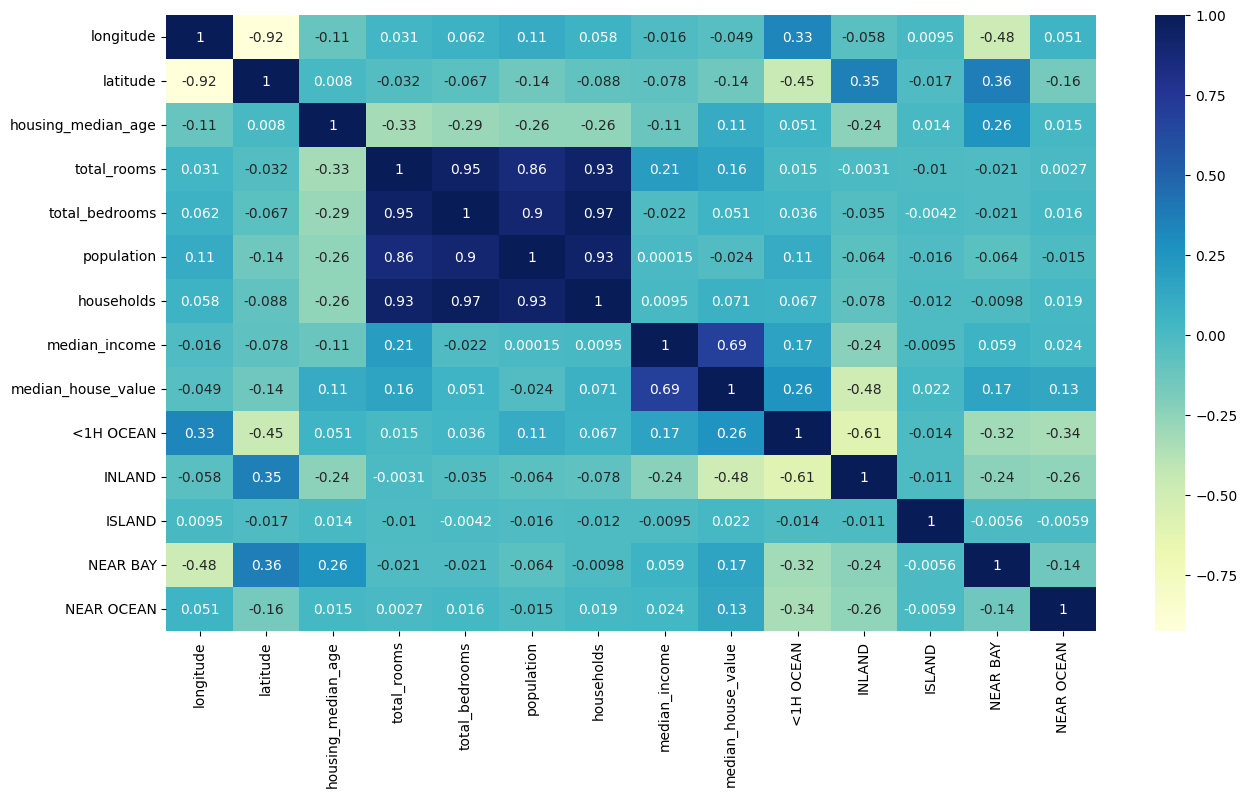

In [51]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap= "YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

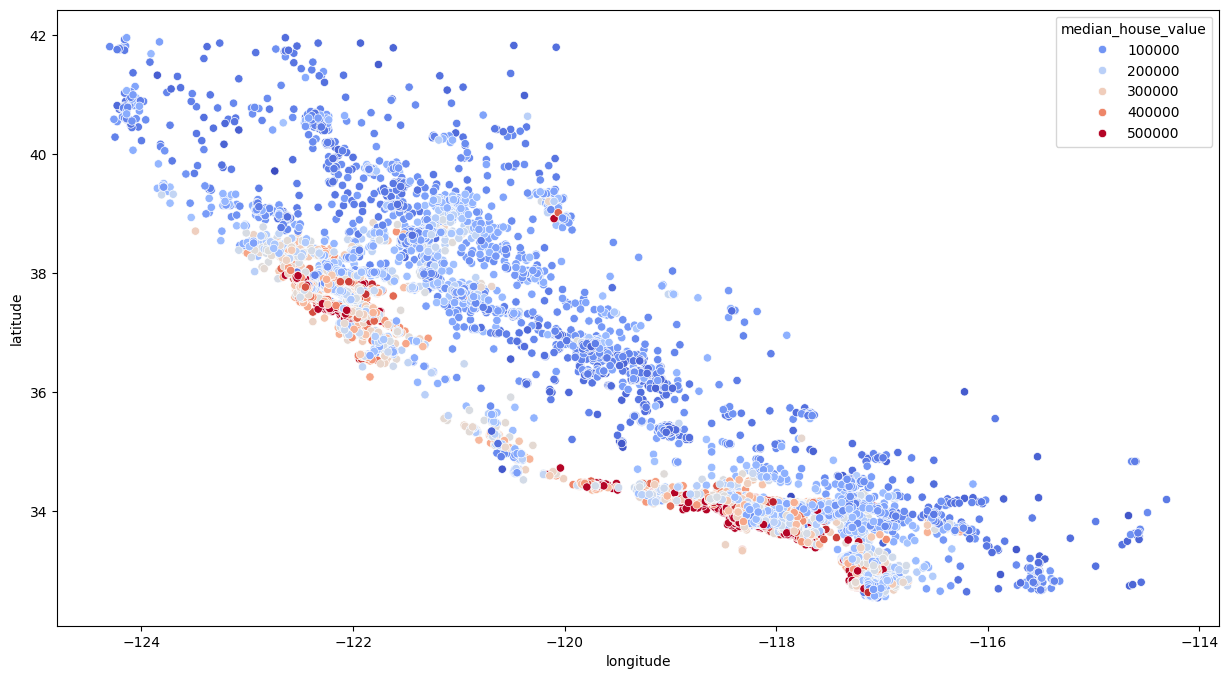

In [52]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "longitude", y = "latitude", data = train_data, hue = "median_house_value", palette ="coolwarm")

# Feature Engineering

In [53]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/ train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/ train_data["households"]

<Axes: >

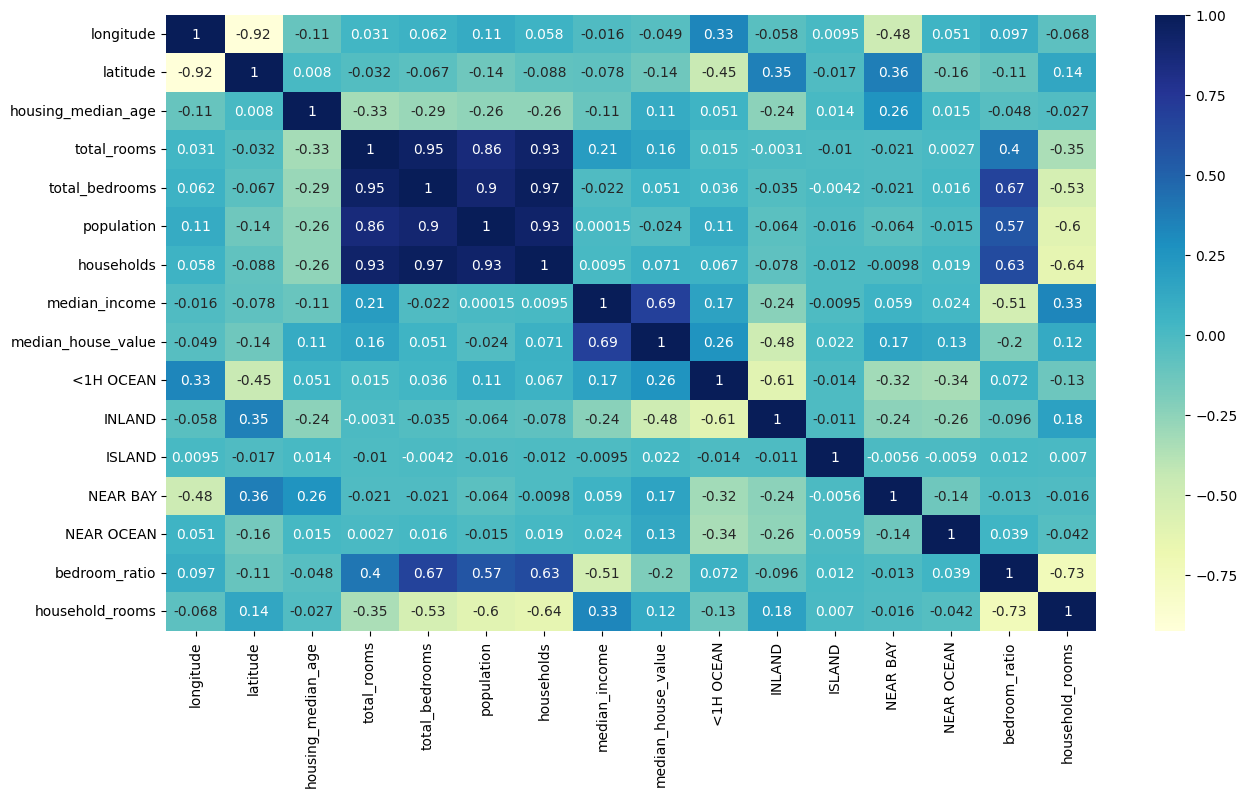

In [54]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap= "YlGnBu")

# Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(["median_house_value"], axis = 1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [56]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5087,-118.28,33.98,45.0,7.450661,6.033086,7.232010,5.902633,0.9337,True,False,False,False,False,0.809738,1.262260
10051,-121.00,39.16,10.0,7.065613,5.420535,6.287859,5.273000,3.2813,False,True,False,False,False,0.767171,1.339961
11961,-117.42,33.89,4.0,4.394449,2.397895,4.025352,2.639057,7.7197,False,True,False,False,False,0.545665,1.665159
637,-122.15,37.73,28.0,7.703459,6.376727,6.722630,6.352629,2.1898,False,False,False,True,False,0.827774,1.212641
13478,-117.39,34.07,26.0,7.235619,5.627621,6.499787,5.480639,3.0278,False,True,False,False,False,0.777766,1.320215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,-120.81,38.73,42.0,7.152269,5.564520,6.684612,5.560682,2.7273,False,True,False,False,False,0.778008,1.286222
15117,-116.95,32.83,14.0,9.434923,7.826842,8.762490,7.755339,3.3081,True,False,False,False,False,0.829561,1.216571
3669,-118.39,34.23,43.0,7.085064,5.703782,7.077498,5.771441,2.1518,True,False,False,False,False,0.805043,1.227607
11661,-118.02,33.81,34.0,8.155649,6.421622,7.708860,6.464588,5.1155,True,False,False,False,False,0.787383,1.261588


## Testing reg a trained Linear Regression model on test_data

In [57]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/ test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/ test_data["households"]


In [58]:
x_test, y_test = test_data.drop(["median_house_value"], axis = 1), test_data["median_house_value"]

In [59]:
reg.score(x_test, y_test)

0.6754831130874657

# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [61]:
forest.score(x_test, y_test)

0.8182837669736189

# Actual vs. Predicted Plot (Side-by-Side)

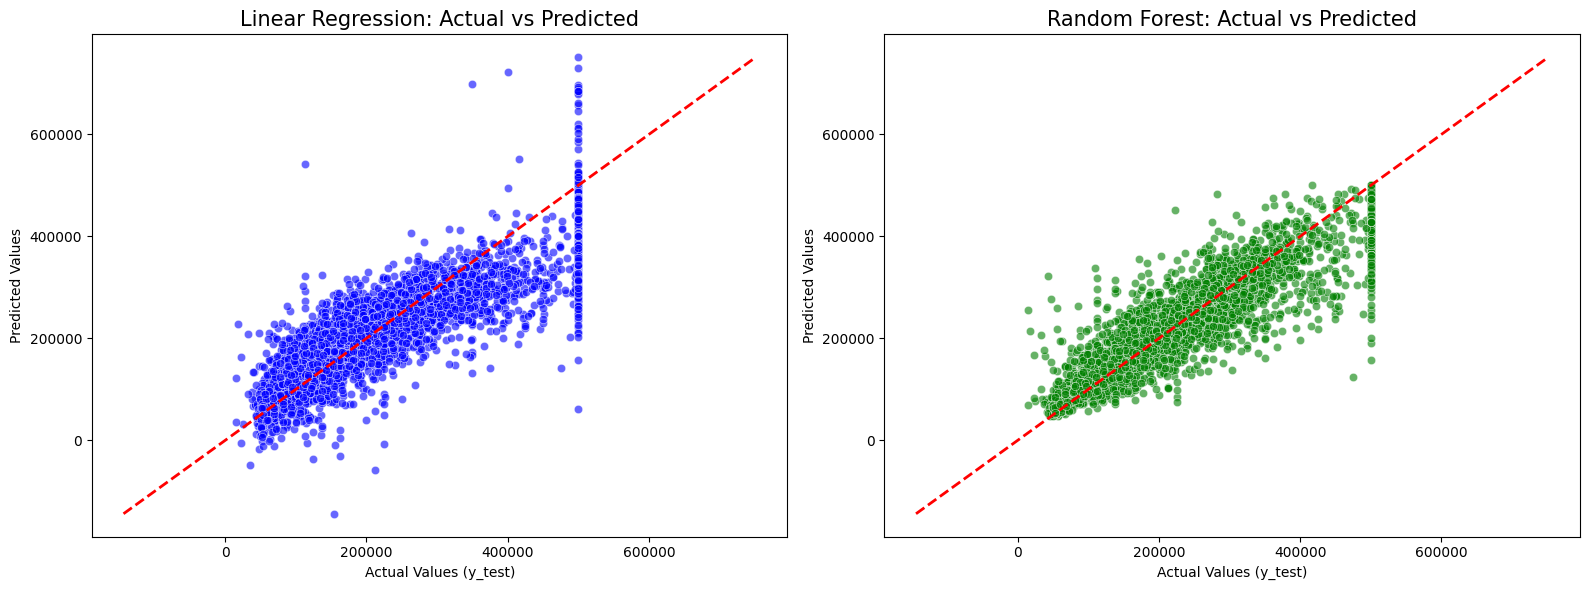

In [62]:
# 1. Get Predictions
y_pred_reg = reg.predict(x_test)
y_pred_forest = forest.predict(x_test)

# 2. Set up the plotting area (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Linear Regression ---
sns.scatterplot(x=y_test, y=y_pred_reg, ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title('Linear Regression: Actual vs Predicted', fontsize=15)
axes[0].set_xlabel('Actual Values (y_test)')
axes[0].set_ylabel('Predicted Values')

# Add a diagonal line (Perfect Prediction Line)
# If points lie on this line, the prediction is perfect.
min_val = min(y_test.min(), y_pred_reg.min())
max_val = max(y_test.max(), y_pred_reg.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2) # Red dashed line

# --- Plot 2: Random Forest ---
sns.scatterplot(x=y_test, y=y_pred_forest, ax=axes[1], color='green', alpha=0.6)
axes[1].set_title('Random Forest: Actual vs Predicted', fontsize=15)
axes[1].set_xlabel('Actual Values (y_test)')
axes[1].set_ylabel('Predicted Values')

# Add the diagonal line here too
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.tight_layout()
plt.show()

# Saving the Random Forest Model

In [63]:
import joblib

# 1. Save the trained model
joblib.dump(forest, "forest_model.pkl")

# 2. Save the column names (CRITICAL for matching inputs later)
# We use x_train.columns so we know exactly what features the model expects
model_columns = list(x_train.columns)
joblib.dump(model_columns, "model_columns.pkl")

print("Model and columns saved successfully!")

Model and columns saved successfully!
